# EDA

## comienzo importando las librerias necesarias

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

## Cargamos los datos a un dataframe de pandas

In [20]:
df_a = pd.read_csv("AircraftCrash.csv", sep=",")
pd.set_option('display.max_columns', None)
df_a.head()

,Index,Date,Event_Time,Location,Operator,Flight_Number,Route,Aircraft_Type,Registration,AC_SerialNumber,Aboard_Total,Passengers_Aboard,Crew_Aboard,Total_Fatalities,Passenger_Fatalities,Crew_Fatalities,Fatalities_From_Ground,Summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


##  Exploración inicial:

In [21]:
#Revisamos si existen nulos

nulos_dataset =  df_a.isnull().sum().sum()
nulos_variable = df_a.isnull().sum()
print("Existen ", nulos_dataset, " a nivel de dataset")
print("Existen los siguientes nulos por variable: ", 
     nulos_variable )

Existen  7954  a nivel de dataset
Existen los siguientes nulos por variable:  Index                        0
Date                         0
Event_Time                1504
Location                     5
Operator                    10
Flight_Number             3682
Route                      763
Aircraft_Type               13
Registration               272
AC_SerialNumber            667
Aboard_Total                17
Passengers_Aboard          221
Crew_Aboard                219
Total_Fatalities             8
Passenger_Fatalities       235
Crew_Fatalities            235
Fatalities_From_Ground      44
Summary                     59
dtype: int64


In [22]:
#revisamos tipos de datos por columna

df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   5008 non-null   int64  
 1   Date                    5008 non-null   object 
 2   Event_Time              3504 non-null   object 
 3   Location                5003 non-null   object 
 4   Operator                4998 non-null   object 
 5   Flight_Number           1326 non-null   object 
 6   Route                   4245 non-null   object 
 7   Aircraft_Type           4995 non-null   object 
 8   Registration            4736 non-null   object 
 9   AC_SerialNumber         4341 non-null   object 
 10  Aboard_Total            4991 non-null   float64
 11  Passengers_Aboard       4787 non-null   float64
 12  Crew_Aboard             4789 non-null   float64
 13  Total_Fatalities        5000 non-null   float64
 14  Passenger_Fatalities    4773 non-null   

In [23]:
df_a.describe()

,Index,Aboard_Total,Passengers_Aboard,Crew_Aboard,Total_Fatalities,Passenger_Fatalities,Crew_Fatalities,Fatalities_From_Ground
count,5008.000000,4991.000000,4787.000000,4789.000000,5000.000000,4773.000000,4773.000000,4964.000000
mean,2503.500000,31.121218,26.877376,4.519524,22.294000,18.940708,3.587262,1.718372
std,1445.829404,45.479965,44.035342,3.758072,35.000385,34.065190,3.177315,55.495544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1251.750000,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,2503.500000,16.000000,12.000000,4.000000,11.000000,7.000000,3.000000,0.000000
75%,3755.250000,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,5007.000000,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000


## Validamos la presencia de nulos con un gráfico

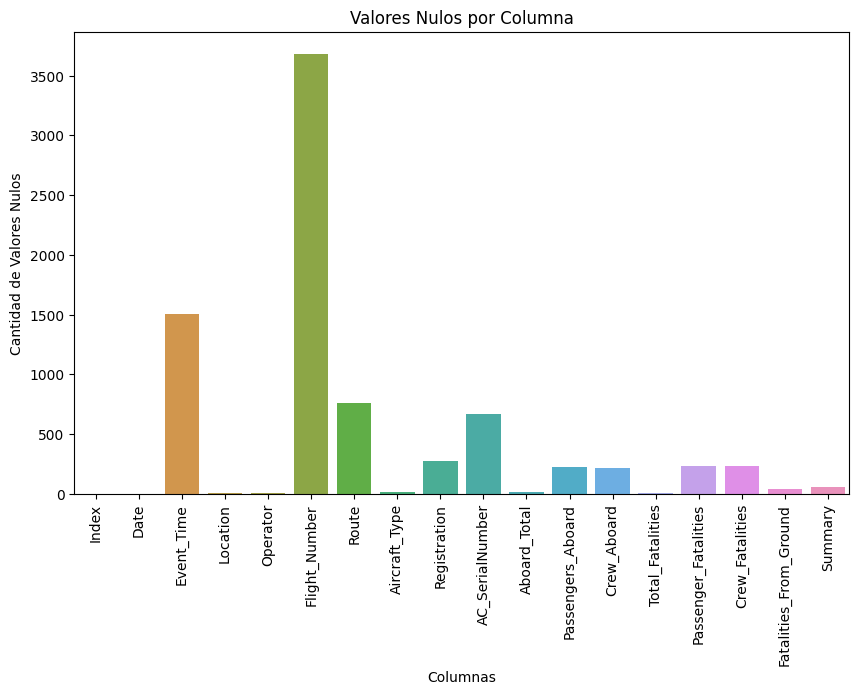

In [24]:
# Contar los valores nulos en cada columna
null_counts = df_a.isnull().sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.title('Valores Nulos por Columna')
plt.show()

## Explorando las columnas numericas...

In [25]:
# Obtener columnas numéricas
columnas_numericas = df_a.select_dtypes(include=[np.number])

# Calcular el rango intercuartílico (IQR) para cada columna numérica
q1 = columnas_numericas.quantile(0.25)
q3 = columnas_numericas.quantile(0.75)
iqr = q3 - q1

# Calcular la mediana (quartil 0.5)
mediana = columnas_numericas.median()

# Definir los límites superior e inferior para detectar outliers
umbral_superior = q3 + 1.5 * iqr
umbral_inferior = q1 - 1.5 * iqr

# Detectar outliers en cada columna numérica
outliers = ((columnas_numericas < umbral_inferior) | (columnas_numericas > umbral_superior))

# Obtener el número de outliers en cada columna
num_outliers = outliers.sum()

# Obtener la cantidad de valores por debajo del mínimo y por encima del máximo para cada columna
valores_por_debajo_min = (columnas_numericas < umbral_inferior).sum()
valores_por_encima_max = (columnas_numericas > umbral_superior).sum()

# Obtener los umbrales mínimo y máximo por columna
umbral_minimo = columnas_numericas.min()
umbral_maximo = columnas_numericas.max()

# Crear una tabla con los resultados
tabla_resultados = pd.DataFrame({
    "Número de outliers": num_outliers,
    "Valores por debajo del mínimo": valores_por_debajo_min,
    "Valores por encima del máximo": valores_por_encima_max,
    "Umbral mínimo": umbral_minimo,
    "Umbral máximo": umbral_maximo,
    "Mediana": mediana
})


tabla_resultados

,Número de outliers,Valores por debajo del mínimo,Valores por encima del máximo,Umbral mínimo,Umbral máximo,Mediana
Index,0,0,0,0.0,5007.0,2503.5
Aboard_Total,500,0,500,0.0,644.0,16.0
Passengers_Aboard,496,0,496,0.0,614.0,12.0
Crew_Aboard,151,0,151,0.0,83.0,4.0
Total_Fatalities,454,0,454,0.0,583.0,11.0
Passenger_Fatalities,444,0,444,0.0,560.0,7.0
Crew_Fatalities,232,0,232,0.0,43.0,3.0
Fatalities_From_Ground,248,0,248,0.0,2750.0,0.0


podemos visualizar que se presentan algunos valores atipicos que están por encima del umbral máximo , lo que indica que:*
* *El 10% (500) de los accidentes tuvieron más de 600 personas a bordo entre pasajeros y tripulantes*
* *El 3%(151) de los acciendentes contaban con una tripulación de más de 80 personas*
* *El 9%(454) de los accidentes presentó más de 580 fallecidos*
* *El 5%(248) de los accidentes fueron una gran catastrofe con más de 2750 muertos en tierra*

## Visualizacion de Outliers

<Axes: >

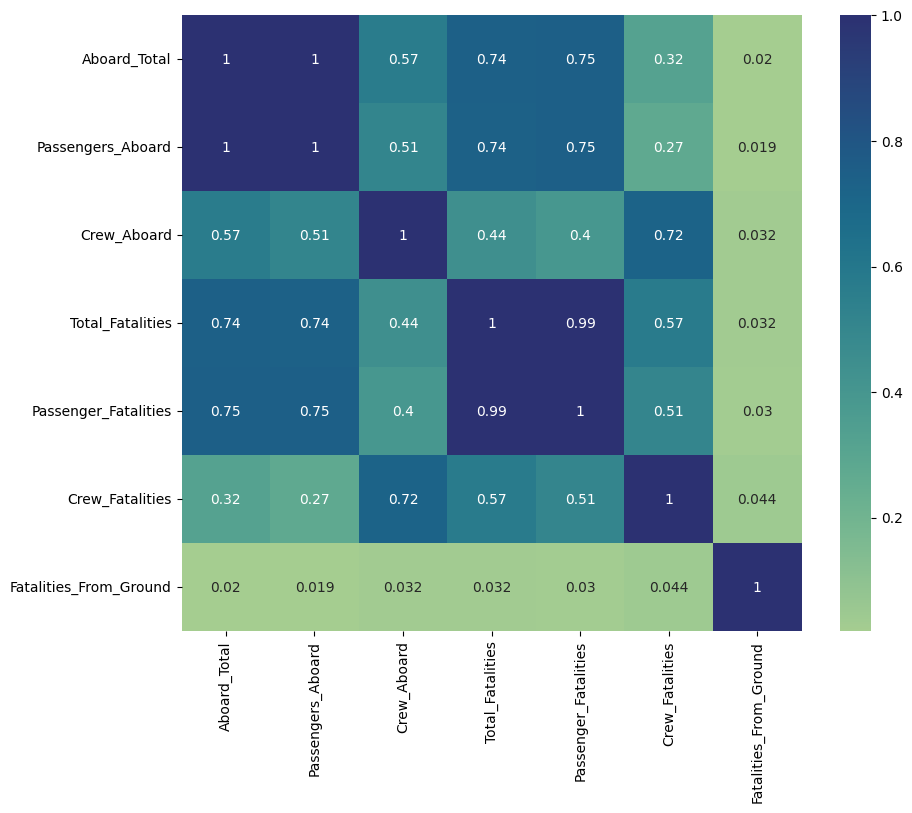

In [27]:
#Creamos una matriz de correlación
df_num = df_a[['Aboard_Total','Passengers_Aboard','Crew_Aboard','Total_Fatalities','Passenger_Fatalities','Crew_Fatalities','Fatalities_From_Ground']]
corr_matrix = df_num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='crest')


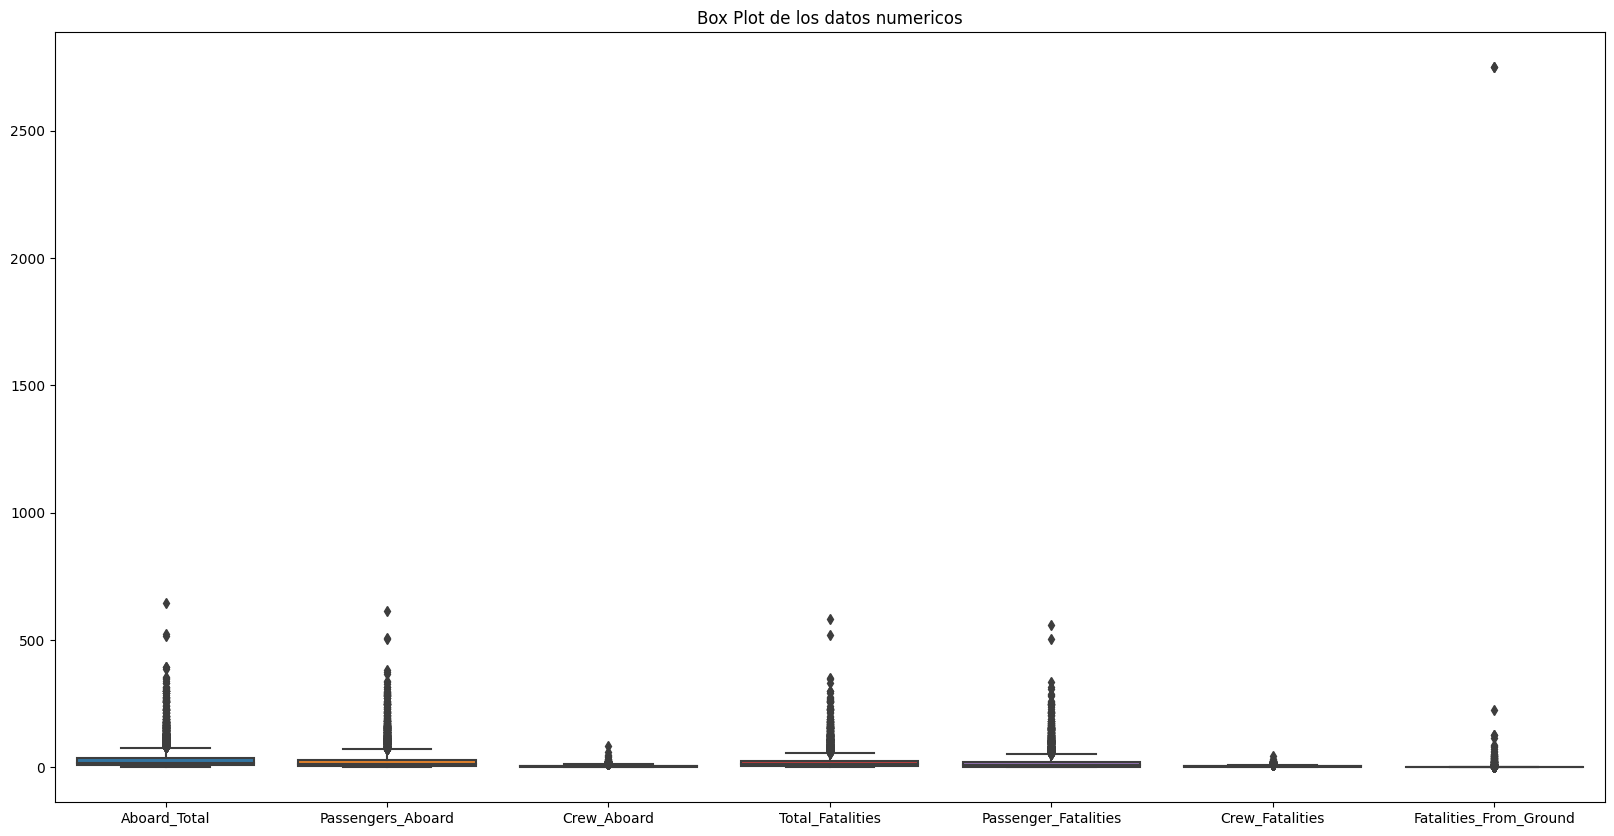

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_a[['Aboard_Total','Passengers_Aboard','Crew_Aboard','Total_Fatalities','Passenger_Fatalities','Crew_Fatalities','Fatalities_From_Ground']])
plt.title('Box Plot de los datos numericos')
plt.show()

> <u>OBSERVACION</u>: 
>>El Outlier de la columna 'Fatalities_From_Ground' se debe a el suceso de las Torres Gemelas, en esa fecha "2001-09-11", hay cuatro siniestros correspondientes a los 4 aviones que impactaron en ese ataque terrorista.

# Oservaciones y graficas

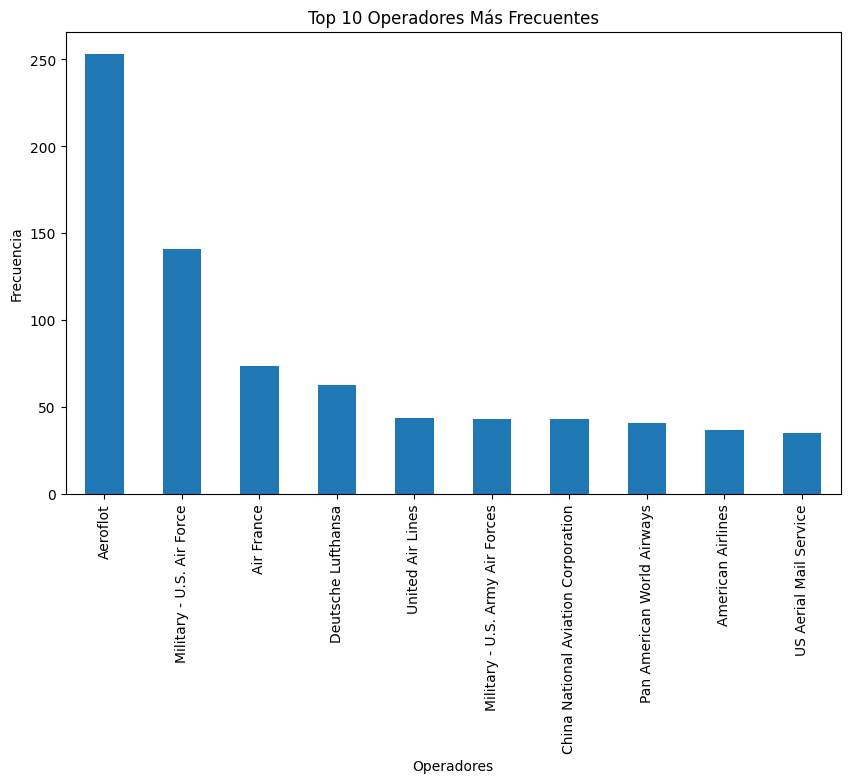

In [29]:
# Calculo y represento los 10 Operadores con mas accidentes aereos

frequencies = df_a['Operator'].value_counts().head(10)
plt.figure(figsize=(10, 6))  
frequencies.plot(kind='bar')
plt.title('Top 10 Operadores Más Frecuentes')
plt.xlabel('Operadores')
plt.ylabel('Frecuencia')
plt.show()

*las aerolineas con más accidentes presentados, top 5 con más de 45 accidentes: Aeroflot, Military U.S Air Force, Air France, Deutsche Lufthansa y United Air Lines.*

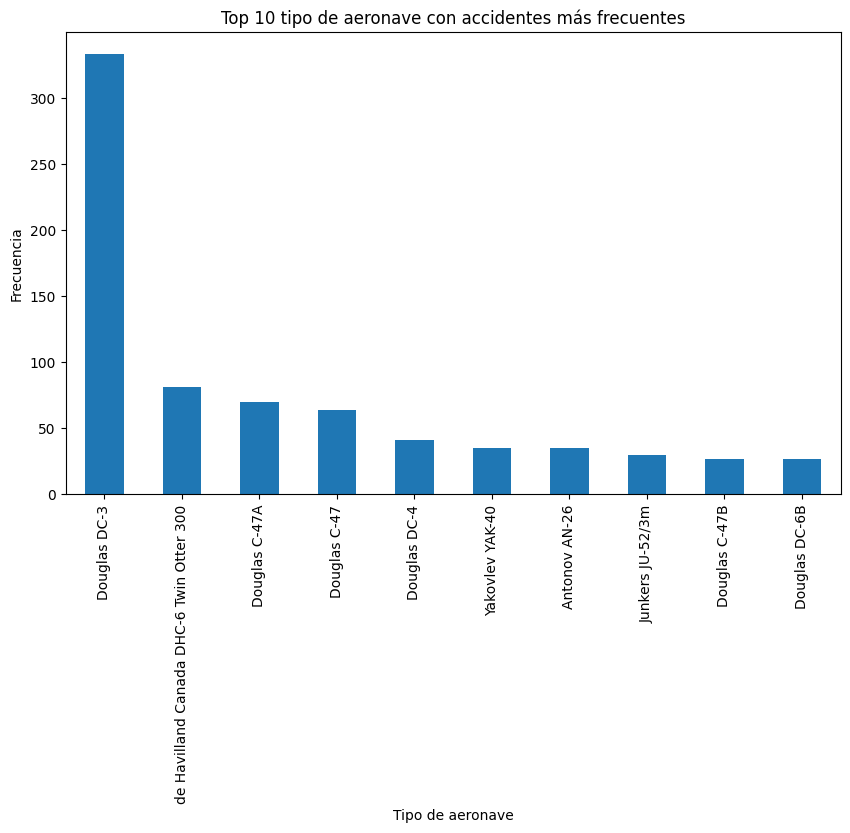

In [30]:
# Filtro y represento las 10 aeronaves con accidentes mas frecuentes

frequencies_top = df_a[df_a['Aircraft_Type'] != 'NaN']['Aircraft_Type'].value_counts().head(10)
plt.figure(figsize=(10, 6)) 
frequencies_top.plot(kind='bar')
plt.title('Top 10 tipo de aeronave con accidentes más frecuentes')
plt.xlabel('Tipo de aeronave')
plt.ylabel('Frecuencia')
plt.show()

*Al analizar los datos, se destaca que los aviones Douglas DC-3, de Havilland Canada DHC-6 Twin Otter 300, Douglas C-47A, Douglas C-47 y Douglas DC-4 son prominentes en la lista de aviones con más accidentes. Estos aviones podrían tener una relación con las rutas con más accidentes mencionadas anteriormente, que incluyen vuelos de entrenamiento, turísticos y de prueba. Esta relación sugiere que ciertos tipos de aviones pueden estar más expuestos a situaciones de mayor riesgo en esas rutas. No obstante, es importante considerar que estos hallazgos son preliminares y se requiere un análisis más detallado para comprender completamente los factores que contribuyen a los accidentes en aviones y rutas específicas.*

# Para finalizar dejo un resumen de palabras

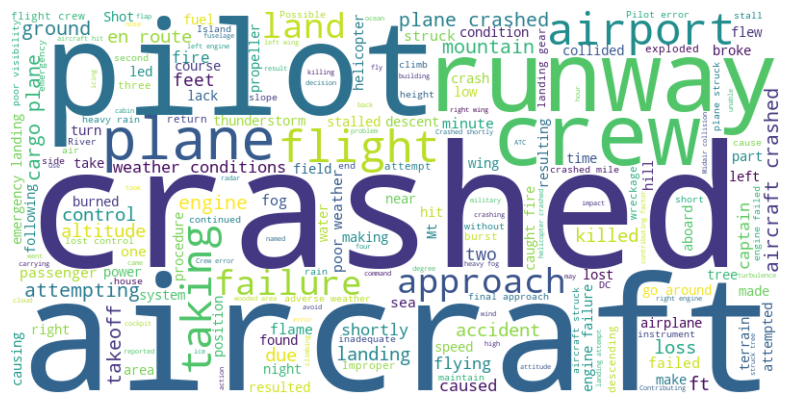

In [31]:
from wordcloud import WordCloud

# Concatena todos los textos en una sola cadena

text = ' '.join(df_a['Summary'].astype(str))

# Crea el objeto WordCloud con los parámetros deseados

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()